<a href="https://colab.research.google.com/github/srimahalakshmi02/house-rent-prediction/blob/main/39110025_HCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House price prediction


In [1]:
%matplotlib inline

In [2]:
#import all requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [4]:
from google.colab import files
uploaded = files.upload()

Saving house rent prediction.xlsx to house rent prediction.xlsx


In [5]:
#load the dataset

df=pd.read_excel("./house rent prediction.xlsx")

In [6]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


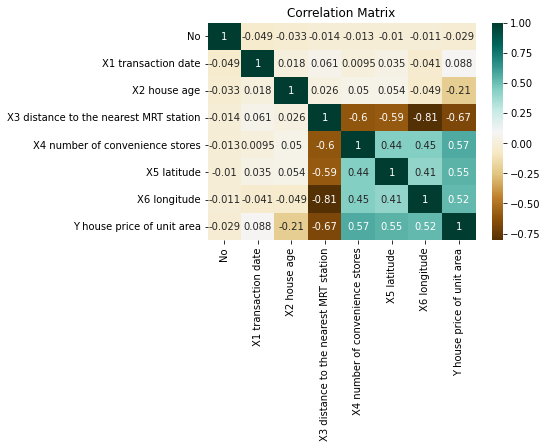

In [10]:
#visualization of correlation matrix

c=df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
#clean the dataset--drop unnecessary columns

df.drop('No',
  axis='columns', inplace=True)

In [12]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
##Data visualization
#finding the relation between independent variable in the dataset
#visualizing the data using matplot library

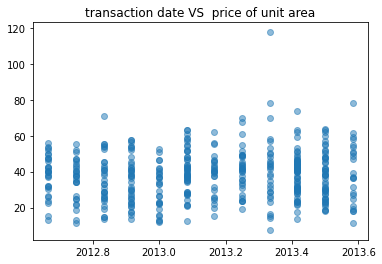

In [14]:
plt.scatter(df['X1 transaction date'],df['Y house price of unit area'],alpha=0.5)
plt.title('transaction date VS  price of unit area')
plt.show()

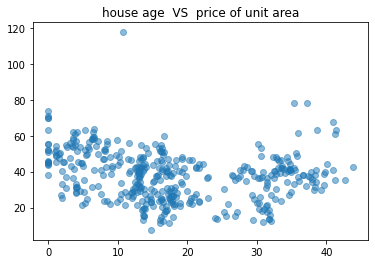

In [15]:
plt.scatter(df['X2 house age'],df['Y house price of unit area'],alpha=0.5)
plt.title('house age  VS  price of unit area')
plt.show()

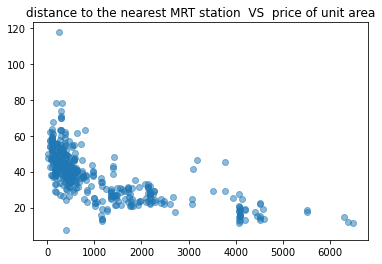

In [16]:
plt.scatter(df['X3 distance to the nearest MRT station'],df['Y house price of unit area'],alpha=0.5)
plt.title('distance to the nearest MRT station  VS  price of unit area')
plt.show()

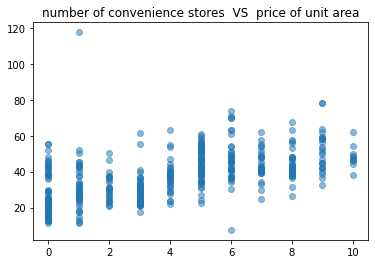

In [17]:
plt.scatter(df['X4 number of convenience stores'],df['Y house price of unit area'],alpha=0.5)
plt.title('number of convenience stores  VS  price of unit area')
plt.show()

In [18]:
#divide the dataset into independent and dependent variables
#dependent variable is called target variable i.e 'Y'

In [19]:
x = df.drop('Y house price of unit area',axis='columns').values
y =df['Y house price of unit area'].values

In [20]:
x.shape

(414, 6)

In [21]:
y.shape

(414,)

In [22]:
#using train test split divide x,y into training and testing data
#they are divided in 70-30 rule

In [23]:
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
reg=LinearRegression()

In [25]:
#fit the linearModel

reg.fit(X_train, y_train)

LinearRegression()

In [26]:
pred_y=reg.predict(X_test)

In [27]:
#predict the values

reg.predict([[2012.916667,32.0,84.87882,10,24.98298,121.54024]])

array([46.99125469])

In [28]:
df=pd.DataFrame(data=y_test,columns=['y_test'])
df['pred_y']=pred_y
df['Diff']=y_test-pred_y
df.head()

,y_test,pred_y,Diff
0,45.3,40.848519,4.451481
1,14.4,12.949804,1.450196
2,46.0,42.167353,3.832647
3,15.6,12.744758,2.855242
4,50.2,43.273846,6.926154


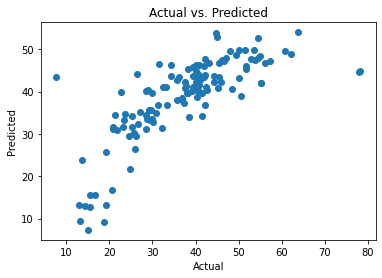

In [29]:
plt.scatter(y_test,pred_y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


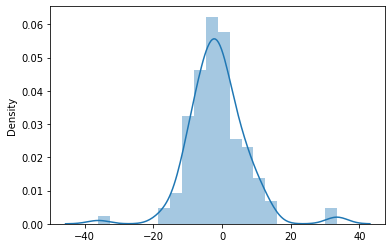

In [30]:
import seaborn as sns
sns.distplot((y_test - pred_y), bins = 20)

In [31]:
#y=b0+b1x1+b2x2+b3x3+b4x4+b5x5+b6x6+E    

In [32]:
# The coefficients

print('Coefficients: \n', reg.coef_)

# The intercept
print('Intercept: \n', reg.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_y))

# mean absolue error

print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, pred_y))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred_y))

Coefficients: 
 [ 5.21013721e+00 -2.75621110e-01 -4.59783392e-03  1.01886348e+00
  2.30116623e+02 -8.73223240e+00]
Intercept: 
 -15129.240624836943
Mean squared error: 71.58
Mean absolute error: 6.06
Coefficient of determination: 0.58


In [33]:
from sklearn import metrics
r_square=metrics.r2_score(y_test,pred_y)
r_square

0.5800106026204439

In [34]:
def RMSE_score(y_actual, y_preds):
    return sqrt(mean_squared_error(y_actual, y_preds))

In [35]:
print("Train score: ", RMSE_score(y_train, reg.predict(X_train)))
print("Test score: ", RMSE_score(y_test, reg.predict(X_test)))

Train score:  8.937203354334164
Test score:  8.460281740972842
